# House price advance analysis

In [124]:
#CSDA 5310 Personal project.
#Presented by Anjesh Sahani

#####################################################
#Importing the required package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sys

In [125]:
#Reading csv data from local machine

df_1 = pd.read_csv("C:/Users/anjes/Desktop/FALL/Visualization/Wk8/dataset/train.csv")
df_2 = pd.read_csv("C:/Users/anjes/Desktop/FALL/Visualization/Wk8/dataset/test.csv")
###############################################################################################################


# Lets have overview of the data first

print(df_1.shape)
print("<!-----------------------------------------------------------------------!>")
print(df_2.shape)


#See, the result is 1460 row and 81 columns

(1460, 81)
<!-----------------------------------------------------------------------!>
(1459, 80)


In [126]:
#Creating dummy SalesPrice columns setting inital value to 0.

if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1,df_2], axis = 0)
df = df.set_index('Id')

In [127]:
#Lets have overview of the data first
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [128]:
#Disecting data and looking for in-consistency, like Null values, Missing vales etc.
df.isna().sum() 

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [129]:
#Now, looking through each column that has Null value greater than 0
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index]

In [130]:
#36 total columns that contains NULL values out of 80 columns
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


<Axes: ylabel='Id'>

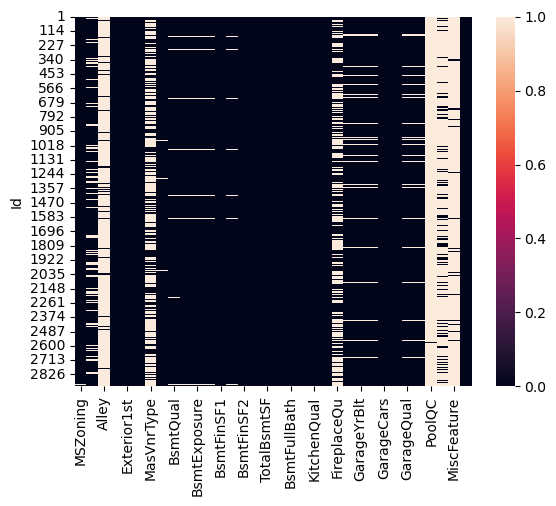

In [131]:
#Heatmap visualization for null value
sns.heatmap(df_null.isnull())

In [132]:
#Now, creating object columns to store categorical string value other than numeric
#dealing with the NULL values that are present in Categorical columns, other than numeric
df_object = df[df.select_dtypes(include=['object']).columns]

#dropping those column in which there is more than one thousand NA value present, to maintain data quality
df = df.drop(df[df_object.isna().sum()[df_object.isna().sum()>1100].index], axis=1)

In [133]:
#Getting those column whose have less NA and filling with NULL string
df_object = df_object.drop(df_object[df_object.isna().sum()[df_object.isna().sum()>1100].index], axis=1)

#Filling with null 
df_object = df_object.fillna('null')

#Encoded object
df_object_encoded = pd.get_dummies(df_object) 

In [135]:
#example, checking inplace of NUll value null string is added or not.
df_object['Utilities'].value_counts()

Utilities
AllPub    2916
null         2
NoSeWa       1
Name: count, dtype: int64

In [102]:
#Dropping those column in which we just filled "null" as a String
#This steps is optional, either way okay, do or not.
for i in df_object_encoded.columns:
    if 'null' in i:
        df_object_encoded = df_object_encoded.drop(i, axis=1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [136]:
#Stoging into new dataframe
new_df = pd.concat([df, df_object_encoded], axis=1)

In [137]:
len(new_df.columns)

321

In [138]:
len(df.columns),
len(df_object_encoded.columns)

247

In [139]:
#And Now, i want only those column which are not categorical value,
#So i am accessing the main dataframe and droping categorical value
#Now new_df dataframe contains only numerical value
new_df = new_df.drop(df.select_dtypes(include=['object']), axis = 1)

#condition for checking null value in every single column, and if it is turn out to be true then display,
new_df.isna().sum()[new_df.isna().sum()> 0]

#Means these are the numerical column but still have null value in these, so we have to deal with this.

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [140]:
#Here to deal with Null values, i am creating 2 list that appears to be mean and mode value list according to dataset instruction
#The reason i am creating this list to fill the NULL value with mode and mean value of respective columns, so that we will have consistent dat

mode_columns =['GarageCars','GarageYrBlt','BsmtFullBath','BsmtHalfBath']
mean_columns =['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea']


#Now, looping through each mode_columns to fill the mode values in placcae of NA contains, and storing in new_df
for i in mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])
    

#Doing same for mean_columns
#Also, saying give mea rounded value if there is any double or float values exist
for i in mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))
    

#its time to check the new_df dataframe to see if there is still any NA value or  we are good.
new_df.isna().sum()[new_df.isna().sum()>0]

Series([], dtype: int64)

In [141]:
#Okay, so there is no NA value present in our new_df dataframe means we can proceed for furthur Expolotary data analysis
#To do so, lets first merge both tainning data and testing data into one place

#its like both are stacked on 1-100 and 100-end something like this.
#traning data will be lenght of df_1, starts from 0,
traning_data =new_df[0:len(df_1)] 

#now in this will be length of df_1 to end.
testing_data =new_df[len(df_1):]

#sicne this is traing data, we don't need the sales price column that we created in the beigning 
testing_data =testing_data.drop(columns = 'SalePrice')

In [142]:
#This is the time for model traing section
#Based on the given metric, we will train data
import sys
!{sys.executable} -m pip install xgboost

#This will help to split data such like, i want to train on 80% of the data and keep 20% for testing, something like this
from sklearn.model_selection import train_test_split

#This metrics helps us to find how our data is performing basaed on what metrics, one can also choose f-square, there are so many metrics.
from sklearn.metrics import mean_squared_error

#this model; Linear regressing, we can also try polynomial regression
from sklearn.linear_model import LinearRegression

#this model Help to boost traing and testing
from xgboost import XGBRegressor

#Basically we are checking which model performing best among all these three model. Random forest for classification
from sklearn.ensemble import RandomForestRegressor

In [143]:
#Temoprarly doping salesprice colums, since i am not saying inplace = TRUE.
X = traning_data.drop(columns='SalePrice')

#y data is Output level as a SalesPrice
y = traning_data['SalePrice']

#this X-test, and  y-test is out of our main traing_data itself, .20 means testing on 20% of data
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20)

#Now, reshaping the data because the output we will get is one dimensional, but out model need two dimensional data
Y_train = np.reshape(Y_train,(-1,1))
Y_test = np.reshape(Y_test,(-1,1))

#Two dimensional data
X_train.shape, Y_train.shape

((1168, 283), (1168, 1))

In [144]:
#Lets try the first model, Linear Regression
Model_1 =LinearRegression()
Model_1.fit(X,y)
y_prediction = Model_1.predict(X_test)
mean_squared_error(Y_test, y_prediction)


#We are getting pretty high mean square error in momdel_1

364371546.926003

In [145]:
#Setting learning rate, and estimator 
#
Model_2 = XGBRegressor(n_estimators = 1000, learing_rate =0.1)
Model_2.fit(X, y)
y_prediction = Model_2.predict(X_test)
mean_squared_error(Y_test, y_prediction)

#Lowest mean square error, This is the best fit model

c:\Users\anjes\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:43:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "learing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


0.001534187630431293

In [147]:
Model_3 = RandomForestRegressor(n_estimators = 100)
Model_3.fit(X, y)
y_prediction =Model_3.predict(X_test)
mean_squared_error(Y_test, y_prediction)

88433718.63964316

For Visualization purpose

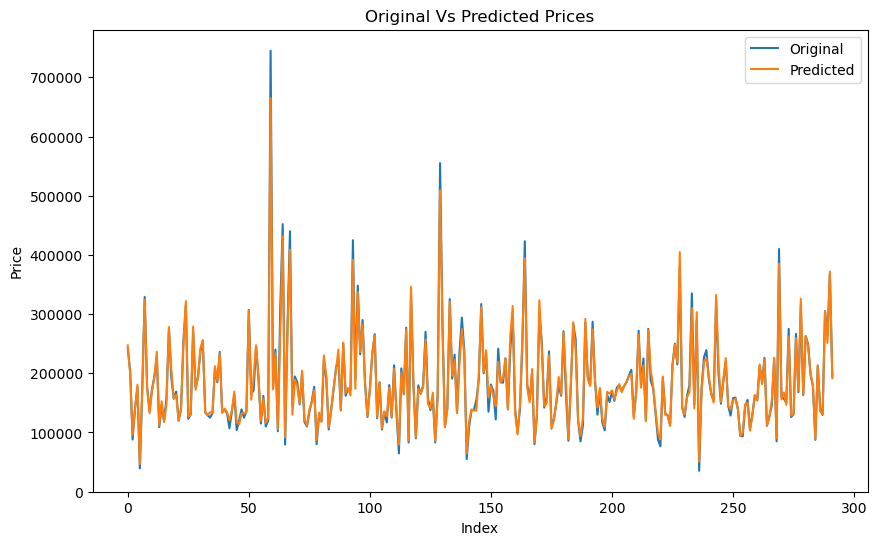

In [121]:
sort_indices = np.argsort(Y_test)

plt.figure(figsize=(10,6))
plt.plot(np.arange(len(Y_test)), Y_test, label = 'Original')
plt.plot(np.arange(len(Y_test)), y_prediction, label = 'Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title("Original Vs Predicted Prices")
plt.legend()
plt.show()

In [148]:
Predicted_Price = Model_2.predict(testing_data)
final = pd.DataFrame()
final['Id'] = testing_data.index
final['SalePrice'] = Predicted_Price

#Write Dataframe to a CSV
final.to_csv("output.csv", index = False)

(array([[1.459e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.500e+01, 2.330e+02, 6.350e+02, 3.230e+02, 1.290e+02, 7.000e+01,
         2.500e+01, 1.600e+01, 1.200e+01, 1.000e+00]]),
 array([  1461.     ,  60468.71875, 119476.4375 , 178484.15625,
        237491.875  , 296499.59375, 355507.3125 , 414515.03125,
        473522.75   , 532530.46875, 591538.1875 ]),
 <a list of 2 BarContainer objects>)

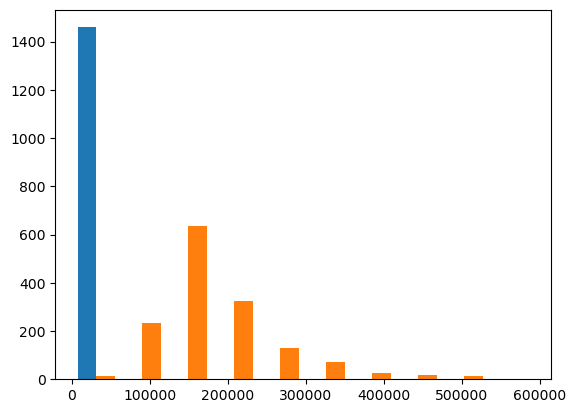

In [149]:
plt.hist(final)